<a href="https://colab.research.google.com/github/yardsale8/DSCI_210_R_notebooks/blob/main/activity_7_6_more_reshaping_table_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 7.6 - More Stacking and Unstacking in R

## Review - Stack and Unstack


* `library(tidyr)` or `library(tidyverse)`
* Stack $\rightarrow$ `gather`
* Unstack $\rightarrow$ `spread`

In [1]:
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Translating JMP to `dplyr/tidyr`

### Stack/`gather`

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_0.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_1.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_2.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_3.png">

### Unstack/`spread()`

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_1.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_2.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_3.png">

## Review - The stack + mutate + aggregate +  unstack trick

Recall that we can use stacking and unstacking columns to automate applying the same transformations to many columns

### Example - Recoding auto sales

In [3]:
sales <- read.csv("https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/auto_sales.csv")
sales

Salesperson Compact Sedan SUV Truck
1 Ann         22      18    15  12   
2 Bob         19      12    17  20   
3 Yolanda     19       8    32  15   
4 Xerxes      12      23    18   9

In [5]:
(sales
 %>% gather(key = "auto_type",
            value = "num_sales",
            Compact:Truck)
 %>% mutate(car_type = recode(auto_type,
                             `Compact` = 'car',
                             `Sedan` = 'car',
                             `SUV` = 'utility',
                             `Truck` = 'utility'))
 %>% summarize(total_sales = sum(num_sales),
               .by = c(Salesperson, car_type))
 %>% spread(key = car_type,
            value = total_sales)
 )

Salesperson car utility
1 Ann         40  27     
2 Bob         31  37     
3 Xerxes      35  27     
4 Yolanda     27  47

## <font color="red"> Exercise 7.6.1 </font>

Recall that the MoMA `Artist.csv` data had two columns (`BeginDate` and `EndDate`) that needed to be cleaned up by  replacing zeros with with a better representation of missing values, namely `NA` in R.

Since we need to perform the same transformations on both columns, we can use the stack + transform + unstack trick to clean both columns at once.

In [ ]:
artist = read.csv("https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv")
head(artist)

ConstituentID DisplayName     ArtistBio           Nationality Gender
1 1             Robert Arneson  American, 1930–1992 American    Male  
2 2             Doroteo Arnaiz  Spanish, born 1936  Spanish     Male  
3 3             Bill Arnold     American, born 1941 American    Male  
4 4             Charles Arnoldi American, born 1946 American    Male  
5 5             Per Arnoldi     Danish, born 1941   Danish      Male  
6 6             Danilo Aroldi   Italian, born 1925  Italian     Male  
  BeginDate EndDate Wiki.QID ULAN     
1 1930      1992                    NA
2 1936         0                    NA
3 1941         0                    NA
4 1946         0    Q1063584 500027998
5 1941         0                    NA
6 1925         0                    NA

**Task:** Fix this issue by

1. Use `gather` stack the two columns.
2. Using `mutate` and `ifelse` to replace all zeros with `NA`.
3. Use `spread` to unstack the two columns, this time giving them more meaningful names.

In [ ]:
# Your code here

## <font color="red"> Exercise 7.6.2 </font>

In Activity 7.4, the first problem had you managing data related to a health care survey, namely.

1. Stacking all the responses,
2. Recoding the responses to numbers,
3. Recoding the question labels to the main question type,
4. Computing the total score for each main question type for participant,
5. Unstacking the totals into one column per question type.

Details can be found in the activity 7.4 worksheet and the data is available in the GitHub data folder.

**Task.** Repeat this process using R.



In [6]:
# Your code here

## <font color="red"> Exercise 7.6.3 </font>

In this assignment we will visualize the effect of the introduction of the  designated hitter, by comparing the best overall team-wide earned run average (ERA) for each league. In the process, you will see an important application of reshaping tables when creating visualizations.  

Take a look at the `Teams.csv` file.  This file contains, for each season, team-by-team statistics.  We will focus on the ERA, which measures the average number of runs allowed by each team’s pitchers over a 9-inning game, with a smaller number indicating better pitching + defense.
Your job is to recreate the following graph.  

<img src="https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/img/min_era.png"/>

In [ ]:
teams <- read.csv('https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/Teams.csv')
head(teams)

yearID lgID teamID franchID divID Rank G  Ghome W  L  ⋯ DP FP   
1 1871   NA   BS1    BNA            3    31 NA    20 10 ⋯ 24 0.834
2 1871   NA   CH1    CNA            2    28 NA    19  9 ⋯ 16 0.829
3 1871   NA   CL1    CFC            8    29 NA    10 19 ⋯ 15 0.818
4 1871   NA   FW1    KEK            7    19 NA     7 12 ⋯  8 0.803
5 1871   NA   NY2    NNA            5    33 NA    16 17 ⋯ 14 0.840
6 1871   NA   PH1    PNA            1    28 NA    21  7 ⋯ 13 0.845
  name                    park                         attendance BPF PPF
1 Boston Red Stockings    South End Grounds I          NA         103  98
2 Chicago White Stockings Union Base-Ball Grounds      NA         104 102
3 Cleveland Forest Citys  National Association Grounds NA          96 100
4 Fort Wayne Kekiongas    Hamilton Field               NA         101 107
5 New York Mutuals        Union Grounds (Brooklyn)     NA          90  88
6 Philadelphia Athletics  Jefferson Street Grounds     NA         102  98
  teamIDBR teamIDlahman45 teamIDretro
1 BOS      BS1            BS1        
2 CHI      CH1            CH1        
3 CLE      CL1            CL1        
4 KEK      FW1            FW1        
5 NYU      NY2            NY2        
6 ATH      PH1            PH1

**Tasks:**

1. Filter the data to only the years after World War II (1946+).
2. Group and aggregate the data to compute the minimum ERA for each league for each season.
3. Split the min(ERA) by the leagues so that you have the two columns of min(ERA) values—one for each league—with one row per year.
4. Compute AL – NL, storing the result in a new column.
5. Stack the data for the AL, NL, and AL – NL, with the labels column called Type and the data column called min(ERA).
6. Save the resulting data frame to a variable named `min_era_by_league`

In [ ]:
# Your code here

The `ggplot2` library can be used to create the graph.  Since creating plots with `ggplot2` is outside the scope of the course, I have provided the code needed to create this plot.  

**Note:** Creating plots in `ggplot2` is covered in detail in DSCI 310, which is offered next fall.  If you enjoy creating visualizations, think about taking this course!

In [ ]:
library(ggplot2)

ggplot(min_era_by_league) +
  geom_line(aes(x = yearID, y = min_era, color = league)) +
  geom_hline(yintercept = 0) +
  geom_vline(xintercept = 1973, linetype = "dotted") +
  annotate("text", x = 1958, y = 1, label = "DH introduced to the AL in 1973", size = 3)

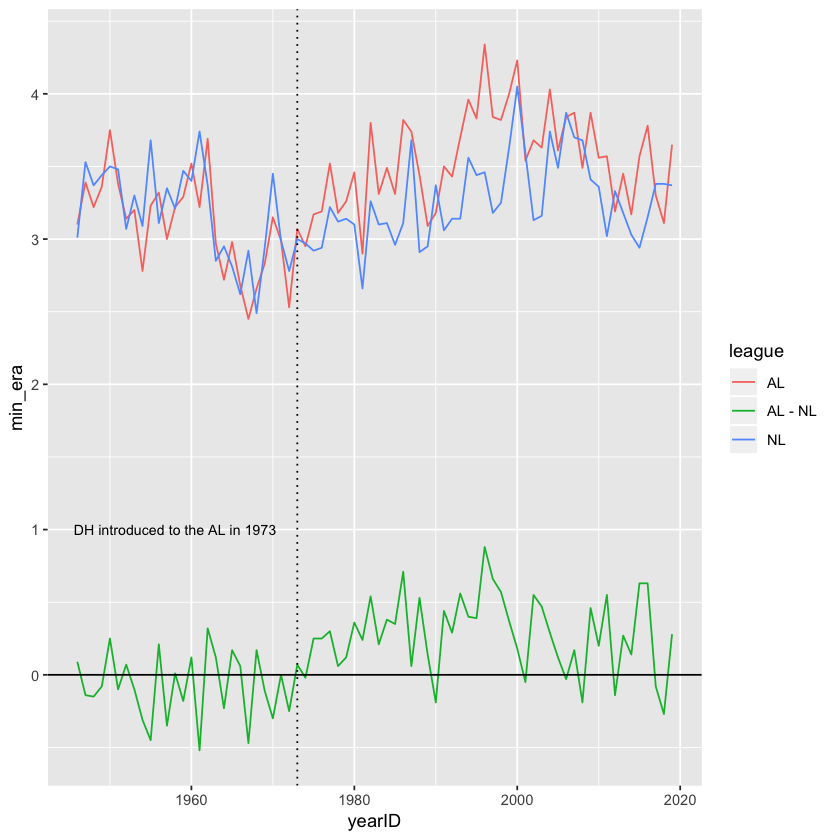

In [ ]:
library(ggplot2)

ggplot(min_era_by_league) +
  geom_line(aes(x = yearID, y = min_era, color = league)) +
  geom_hline(yintercept = 0) +
  geom_vline(xintercept = 1973, linetype = "dotted") +
  annotate("text", x = 1958, y = 1, label = "DH introduced to the AL in 1973", size = 3)